# Read database records into pandas dataframe and write it back

In [1]:
import pandas as pd
import sqlalchemy

https://www.youtube.com/watch?v=M-4EpNdlSuY&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=14

Needed to create a SQL file. Then watch the tutorial

# Handle Large Datasets in Pandas

https://pythonspeed.com/articles/pandas-load-less-data/

# Time Series Analysis in Pandas

In [10]:
import pandas as pd
df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")
df.head(5)

C:\Users\radwa\AppData\Local\Temp\ipykernel_14524\2494894955.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("aapl.csv", parse_dates=["Date"], index_col="Date")


,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-06-30,144.45,144.96,143.78,144.02,23024107


## Topic 1: DateTimeIndex

In [12]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [18]:
# Retrieving data of Januray month.
df.loc["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


In [20]:
# Find average price of stock in Jan,2017
df.loc["2017-01"].Close.mean()

119.57000000000001

In [31]:
# In a range.
df = df.sort_index()
df["2017-01-01":"2017-01-07"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900


## Topic 2: Resampling

In [33]:
# Retrieving monthly data.
df.Close.resample("M").mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

<Axes: xlabel='Date'>

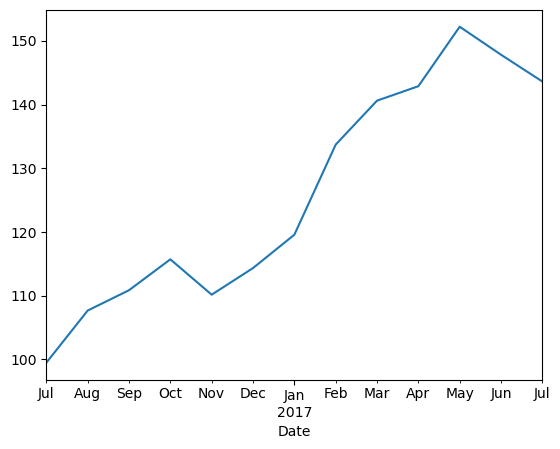

In [38]:
# Plotting chart of monthly frequency.
%matplotlib inline
df.Close.resample("M").mean().plot()

<Axes: xlabel='Date'>

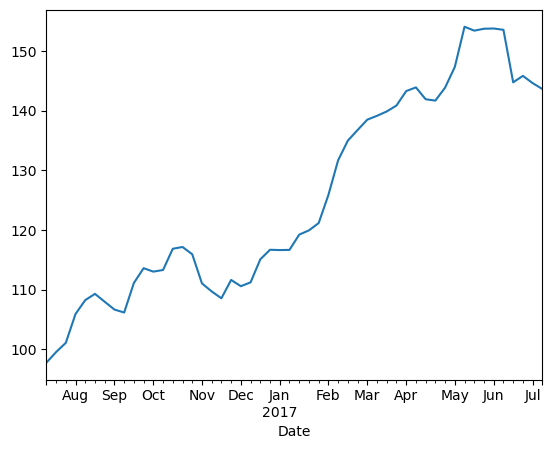

In [40]:
# Plotting chart of mweekly frequency.
df.Close.resample("W").mean().plot()

<Axes: xlabel='Date'>

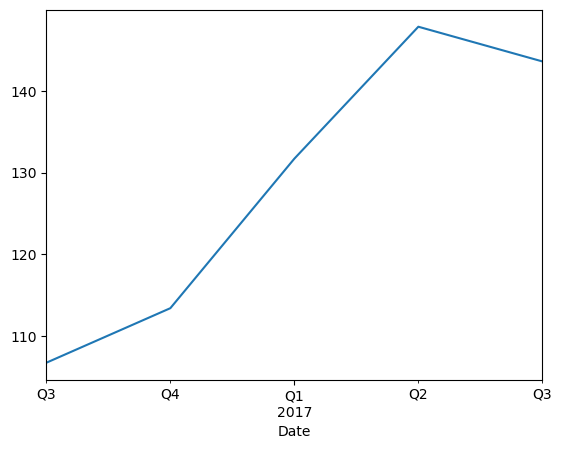

In [41]:
# Plotting chart of Quarterly frequency.
df.Close.resample("Q").mean().plot()

<Axes: xlabel='Date'>

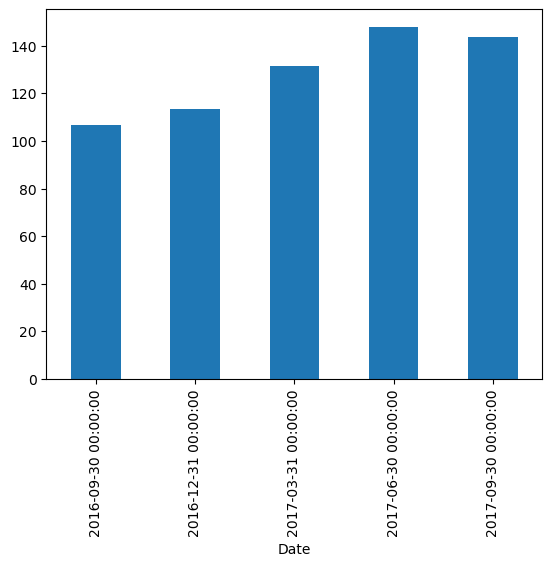

In [43]:
# Plotting bar chart.
df.Close.resample("Q").mean().plot(kind='bar')

<Axes: xlabel='Date'>

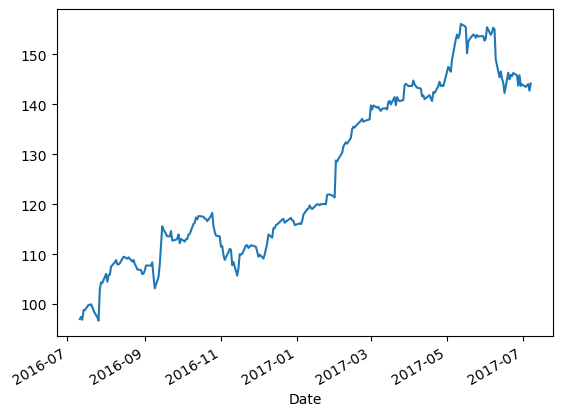

In [44]:
# Chart of overall data.
df.Close.plot()

# Date Range.

In [45]:
import pandas as pd
df = pd.read_csv('aapl_no_dates.csv')
df.head(5)

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


In [47]:
# Generate dates and insert into data frame.
rng = pd.date_range(start="6/1/2017", end="6/30/2017", freq="B") 
# B means business days, which excludes weekends
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [50]:
# Setting dates as index.
df.set_index(rng, inplace=True)
df.head(5)

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647


<Axes: >

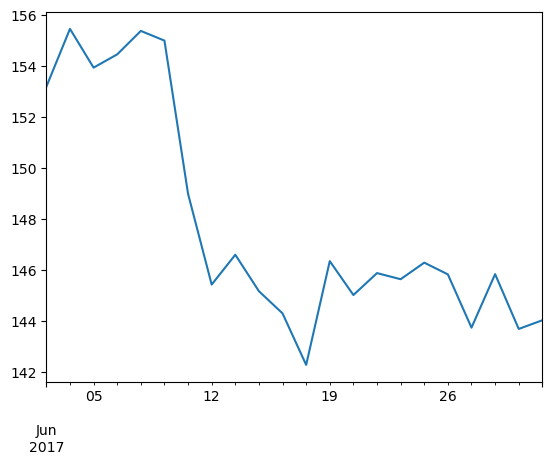

In [51]:
%matplotlib inline
df.Close.plot()

In [52]:
# We can do partial date selection using date_range function.
df["2017-06-01":"2017-06-10"].Close.mean()

153.7642857142857

In [53]:
# In data frame, weekends days datas are not present. Putting datas into the empty dates.
df.asfreq("D", method="pad") # Days includes the weekend. 

,Open,High,Low,Close,Volume
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-03,153.58,155.45,152.89,155.45,27770715
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798
2017-06-09,155.19,155.19,146.02,148.98,64882657
2017-06-10,155.19,155.19,146.02,148.98,64882657


In [55]:
# Weekly datas.
df.asfreq("W", method="pad")

,Open,High,Low,Close,Volume
2017-06-04,153.58,155.45,152.89,155.45,27770715
2017-06-11,155.19,155.19,146.02,148.98,64882657
2017-06-18,143.78,144.50,142.20,142.27,50361093
2017-06-25,145.13,147.16,145.11,146.28,35439389


In [59]:
# Say we know periods and the start date. But don't know the end date.
new_rng = pd.date_range(start="1/1/2017", periods=72, freq="B")  # Excludes weekends.
new_rng

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02',
               '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08',
               '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14',
               '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-20',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14',
               '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20',
      

In [63]:
# Generating some fake datas for test data. Using numpy.
import numpy as np
# start = 1, to=10, how many numbers= 72(rng)
# Generating pandas series.
ts = pd.Series(np.random.randint(1,10,len(new_rng)), index=new_rng)
ts.head(10)

2017-01-02    5
2017-01-03    9
2017-01-04    7
2017-01-05    3
2017-01-06    1
2017-01-09    1
2017-01-10    5
2017-01-11    7
2017-01-12    8
2017-01-13    1
Freq: B, dtype: int32

Date_range only handles weekends but not special days like independence days etc.
For this we use Holidays.

# Pandas Holidays.